### <b>실전 프로젝트 - 기본적인 기계학습 알고리즘을 활용한 풍경(Scene) 이미지 분류</b>

* 한 장의 풍경 이미지가 주어졌을 때, 어떠한 카테고리(category)에 속하는지 맞추는 <b>분류 모델</b>을 만드세요.
* 다음의 두 가지 기본적인 기계학습 알고리즘을 실습합니다.
    1. 선형 분류 모델(Linear Models for Classification)
    2. KNN (K-Nearest Neighbors)
* 본 프로젝트는 <b>총 9개의 문제</b>로 구성됩니다.
    * <b>Problem</b>이라고 명시된 부분의 소스코드만 작성합니다.
    * <b>알아보기</b>라고 명시된 부분은 단순히 읽고 실행하면 됩니다.
    * 단계적으로 문제를 풀어나가는 과정에서 분류 모델을 학습하는 기본적인 방법을 이해할 수 있습니다.

#### <b>Problem 1. 데이터셋 다운로드 및 분석하기</b>

* [Scene Classification 데이터셋 저장소](https://github.com/ndb796/Scene-Classification-Dataset)
    * 참고: [원본 Kaggle 데이터셋 링크](https://www.kaggle.com/nitishabharathi/scene-classification)
    * 본 데이터셋은 <b>저작권이 없는(No Copyright)</b> [CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/) 라이센스를 따라므로, 자유롭게 변형할 수 있습니다.
* 다음의 명령어를 이용해 데이터셋을 다운로드할 수 있습니다.

<pre>
# 깃허브에서 데이터셋 다운로드하기
!git clone https://github.com/ndb796/Scene-Classification-Dataset 
# 폴더 안으로 이동
%cd Scene-Classification-Dataset
</pre>

In [1]:
# 깃허브에서 데이터셋 다운로드하기

# 폴더 안으로 이동


#### <b>(알아보기) 데이터셋 설명</b>

* 장면(scene) 데이터셋은 24,335개의 다양한 자연 경치(scene) 이미지로 구성되어 있습니다.
* 총 6개의 클래스(class)로 구성됩니다.

<pre>
0. 빌딩(buildings)
1. 숲(forests)
2. 빙하(glacier)
3. 산(mountains)
4. 바다(sea)
5. 거리(street)
</pre>

* 각 이미지는 150 X 150 크기를 가집니다.
* 데이터셋 폴더 구성은 다음과 같습니다.

<pre>
Dataset/
    train-scene classification/
        train/ # 전체 이미지가 담긴 폴더입니다.
            0.jpg
            1.jpg
            2.jpg
            ...
            24333.jpg
            24334.jpg
        train.csv # 학습 이미지마다 클래스(class) 정보가 포함되어 있습니다.
    test_WyRytb0.csv # 최종 테스트(test) 이미지의 번호를 포함하며, 본 실습에서 사용하지 않습니다.
</pre>

#### <b>(알아보기) 학습 이미지 확인 방법</b>

* 학습할 데이터셋을 확인합니다.
* os 라이브러리의 os.listdir()를 이용하여 이미지 폴더에 존재하는 파일 이름을 확인합니다.
* pandas 라이브러리의 read_csv()를 이용하여 train.csv 파일을 읽습니다.
    * 참고: [pandas의 기본 사용법](https://www.youtube.com/watch?v=9PF4BAFh-J8)

In [2]:
import os
import pandas as pd

path = os.getcwd()
now = os.path.join(path,'train-scene classification')
train_path = os.path.join(now,'train')
# 전체 이미지 개수 출력하기
file_list = os.listdir(train_path)
print('전체 이미지의 개수:', len(file_list))

# 학습 이미지 확인하기
dataset = pd.read_csv(os.path.join(now,'train.csv'))
print('학습 이미지의 개수:', len(dataset))
print('학습 이미지별 클래스 정보')
dataset.head()

전체 이미지의 개수: 24335
학습 이미지의 개수: 17034
학습 이미지별 클래스 정보


,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


#### <b>Problem 2. 클래스별 학습 이미지 개수 출력하기</b>

* 클래스별 학습 이미지의 개수를 구하세요.
    * pandas 라이브러리의 데이터프레임(DataFrame)을 이용하면 매우 간단한 코드로 구현할 수 있습니다.
    * 예를 들어 label 컬럼(column)의 값이 3인 데이터의 개수는 다음과 같이 확인 가능합니다.
    * 참고: [pandas의 활용](https://www.youtube.com/watch?v=5ZiP4HRFBqU)

<pre>
my_frame[my_frame.label == 3]
</pre>

* 총 학습 이미지의 수는 17034개, 클래스의 개수는 6개입니다.
* <b>클래스 0</b>: {2628}
* <b>클래스 1</b>: {2745}
* <b>클래스 2</b>: {2957}
* <b>클래스 3</b>: {3037}
* <b>클래스 4</b>: {2784}
* <b>클래스 5</b>: {2883}

In [3]:
print(dataset[dataset.label == 0].shape)
print(dataset[dataset.label == 1].shape)
print(dataset[dataset.label == 2].shape)
print(dataset[dataset.label == 3].shape)
print(dataset[dataset.label == 4].shape)
print(dataset[dataset.label == 5].shape)

(2628, 2)
(2745, 2)
(2957, 2)
(3037, 2)
(2784, 2)
(2883, 2)


#### <b>(알아보기) 특정한 이미지를 불러와 화면에 출력하기</b>

* PIL 라이브러리로 특정한 경로의 이미지를 불러와 numpy 객체로 만들 수 있습니다.

<pre>
img = np.asarray(Image.open(이미지 경로))
</pre>

* Numpy 객체는 matplotlib를 이용해 간단히 시각화할 수 있습니다.

<pre>
plt.imshow(img)
plt.show()
</pre>

* 원본 이미지의 크기가 너무 크므로, 모든 이미지를 64 X 64 X 3의 크기로 변경합니다.

이미지의 해상도: (64, 64, 3)


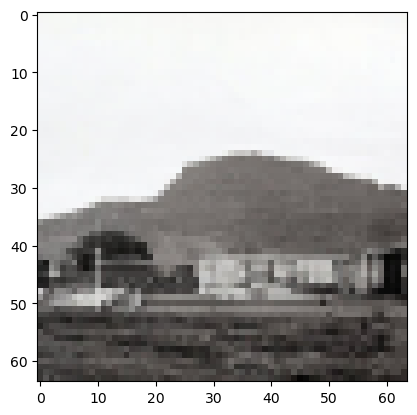

In [4]:
from skimage.transform import resize
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

img = Image.open(os.path.join(train_path, file_list[0]))
img = np.asarray(img)
img = resize(img, (64, 64, 3))
print('이미지의 해상도:', img.shape)

# 이미지 출력하기
plt.imshow(img)
plt.show()

#### <b>(알아보기) 학습/검증 데이터셋 나누는 방법</b>

* sklearn 라이브러리의 train_test_split()을 이용해 학습/검증 데이터셋을 구분합니다.
* 학습 이미지 데이터를 8:2의 비율로 학습(training)과 검증(validation) 데이터로 구분합니다.
* train_test_split() 함수의 주요 파라미터는 다음과 같습니다.
    * <b>test_size</b>: 테스트 데이터셋의 비율(default = 0.25)
    * <b>train_size</b>: 학습 데이터셋의 비율(default = 1 - test_size)
    * <b>shuffle</b>: 데이터를 분할할 때 자동으로 데이터 섞기(shuffle)를 수행합니다.

In [5]:
from sklearn.model_selection import train_test_split


train_dataset, val_dataset = train_test_split(dataset, test_size=0.2)

print('학습 데이터셋 크기:', len(train_dataset))
print('검증 데이터셋 크기:', len(val_dataset))

학습 데이터셋 크기: 13627
검증 데이터셋 크기: 3407


#### <b>Problem 3. 학습/검증 데이터셋 구성하기</b>

* 이미지는 별도의 폴더 안에 존재합니다.
* 모든 이미지를 읽어 와 <b>전체 이미지 데이터를 Numpy 객체로 구성</b>할 필요가 있습니다.
* 다음과 같이 X_train, y_train, X_test, y_test 변수의 shape이 구성되도록 소스코드를 작성하세요.
    * <b>X_train</b>: (13627, 64, 64, 3)
    * <b>y_train</b>: (13627,)
    * <b>X_test</b>: (3407, 64, 64, 3)
    * <b>y_test</b>: (3407,)
* <b>(힌트)</b> train_dataset의 image_name 컬럼과 label 컬럼을 한 줄에 하나씩 출력하는 방법은 다음과 같습니다.
    * 참고로 순서(index) 값 자체는 0부터 시작하지 않습니다.

<pre>
for index, row in train_dataset.iterrows():
    print(index, row['image_name'], row['label'])
</pre>

In [8]:

y_train = np.array(train_dataset['label'])
y_val = np.array(val_dataset['label'])
custom_size = (64,64,3)
X_train = np.zeros((y_train.shape[0],custom_size[0],custom_size[1],custom_size[2]))
X_val = np.zeros((y_val.shape[0],custom_size[0],custom_size[1],custom_size[2]))
print("train")
for i, row in enumerate(train_dataset.image_name):
    print(i)
    img = Image.open(os.path.join(train_path, row))
    img = np.asarray(img)
    X_train[i,:,:,:] = resize(img, custom_size)
    
print("test")
for i, row in enumerate(val_dataset.image_name):
    print(i)
    img = Image.open(os.path.join(train_path, row))
    img = np.asarray(img)
    X_val[i,:,:,:] = resize(img, custom_size)




train
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275


1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097


3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784


5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441


6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7119
7120


8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698
8699
8700
8701
8702
8703
8704
8705
8706
8707
8708
8709
8710
8711
8712
8713
8714
8715
8716
8717
8718
8719
8720
8721
8722
8723
8724
8725
8726
8727
8728
8729
8730
8731
8732
8733
8734
8735
8736
8737
8738
8739
8740
8741
8742
8743
8744
8745
8746
8747
8748
8749
8750
8751
8752
8753
8754
8755
8756
8757
8758
8759
8760
8761
8762
8763
8764
8765
8766
8767
8768
8769
8770
8771
8772
8773
8774
8775


10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
10284
10285
10286
10287
10288
10289
10290
10291
10292
10293
10294
10295
10296
10297
10298
10299
10300
10301
10302
10303
10304
10305
10306
10307
10308
10309
10310
10311
10312
10313
10314
10315
10316
10317
10318
10319
10320
10321
10322
10323
10324
10325
10326
10327
10328
10329
10330
10331
10332
10333
10334
10335
10336
10337
10338
10339
10340
10341
10342
10343
10344
10345
10346
10347
10348
10349
10350
10351
10352
10353
10354
10355
10356
10357
10358
10359
10360
10361
10362
10363
10364
10365
10366
10367
10368
10369
10370
10371
10372
10373
10374
10375
10376
10377
10378
10379
10380
10381
10382
10383
10384
10385
10386
10387
10388
10389
1039

11658
11659
11660
11661
11662
11663
11664
11665
11666
11667
11668
11669
11670
11671
11672
11673
11674
11675
11676
11677
11678
11679
11680
11681
11682
11683
11684
11685
11686
11687
11688
11689
11690
11691
11692
11693
11694
11695
11696
11697
11698
11699
11700
11701
11702
11703
11704
11705
11706
11707
11708
11709
11710
11711
11712
11713
11714
11715
11716
11717
11718
11719
11720
11721
11722
11723
11724
11725
11726
11727
11728
11729
11730
11731
11732
11733
11734
11735
11736
11737
11738
11739
11740
11741
11742
11743
11744
11745
11746
11747
11748
11749
11750
11751
11752
11753
11754
11755
11756
11757
11758
11759
11760
11761
11762
11763
11764
11765
11766
11767
11768
11769
11770
11771
11772
11773
11774
11775
11776
11777
11778
11779
11780
11781
11782
11783
11784
11785
11786
11787
11788
11789
11790
11791
11792
11793
11794
11795
11796
11797
11798
11799
11800
11801
11802
11803
11804
11805
11806
11807
11808
11809
11810
11811
11812
11813
11814
11815
11816
11817
11818
11819
11820
11821
11822
11823
1182

13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13134
13135
13136
13137
13138
13139
13140
13141
13142
13143
13144
13145
13146
13147
13148
13149
13150
13151
13152
13153
13154
13155
13156
13157
13158
13159
13160
13161
13162
13163
13164
13165
13166
13167
13168
13169
13170
13171
13172
13173
13174
13175
13176
13177
13178
13179
13180
13181
13182
13183
13184
13185
13186
13187
13188
13189
13190
13191
13192
13193
13194
13195
13196
13197
13198
13199
13200
13201
13202
13203
13204
13205
13206
13207
13208
13209
13210
13211
13212
13213
13214
13215
13216
13217
13218
13219
13220
13221
13222
13223
13224
13225
13226
13227
13228
13229
13230
13231
13232
13233
13234
13235
13236
13237
13238
13239
13240
13241
13242
13243
13244
13245
13246
13247
13248
13249
13250
13251
13252
13253
13254
13255
1325

1272
1273
1274
1275
1276
1277
1278
1279
1280
1281
1282
1283
1284
1285
1286
1287
1288
1289
1290
1291
1292
1293
1294
1295
1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471


2957
2958
2959
2960
2961
2962
2963
2964
2965
2966
2967
2968
2969
2970
2971
2972
2973
2974
2975
2976
2977
2978
2979
2980
2981
2982
2983
2984
2985
2986
2987
2988
2989
2990
2991
2992
2993
2994
2995
2996
2997
2998
2999
3000
3001
3002
3003
3004
3005
3006
3007
3008
3009
3010
3011
3012
3013
3014
3015
3016
3017
3018
3019
3020
3021
3022
3023
3024
3025
3026
3027
3028
3029
3030
3031
3032
3033
3034
3035
3036
3037
3038
3039
3040
3041
3042
3043
3044
3045
3046
3047
3048
3049
3050
3051
3052
3053
3054
3055
3056
3057
3058
3059
3060
3061
3062
3063
3064
3065
3066
3067
3068
3069
3070
3071
3072
3073
3074
3075
3076
3077
3078
3079
3080
3081
3082
3083
3084
3085
3086
3087
3088
3089
3090
3091
3092
3093
3094
3095
3096
3097
3098
3099
3100
3101
3102
3103
3104
3105
3106
3107
3108
3109
3110
3111
3112
3113
3114
3115
3116
3117
3118
3119
3120
3121
3122
3123
3124
3125
3126
3127
3128
3129
3130
3131
3132
3133
3134
3135
3136
3137
3138
3139
3140
3141
3142
3143
3144
3145
3146
3147
3148
3149
3150
3151
3152
3153
3154
3155
3156


#### <b>(Hint) 데이터셋 구성 확인하기</b>

* 정상적으로 데이터셋이 구성되었다면, 아래 코드의 실행 결과가 다음과 같아야 합니다.

<pre>
학습 이미지: (13627, 64, 64, 3)
학습 레이블: (13627,)
검증 이미지: (3407, 64, 64, 3)
검증 레이블: (3407,)
</pre>

In [9]:
print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_val.shape)
print('검증 레이블:', y_val.shape)

학습 이미지: (13627, 64, 64, 3)
학습 레이블: (13627,)
검증 이미지: (3407, 64, 64, 3)
검증 레이블: (3407,)


#### <b>(알아보기) 데이터셋 시각화 방법</b>

* 학습 데이터셋에 포함된 이미지를 시각화 합니다.
* 각 클래스에 따른 이미지가 정확한지 확인합니다.
   * 예를 들어 빌딩(buildings) 컬럼에 있는 이미지는 전부 빌딩 이미지여야 합니다.

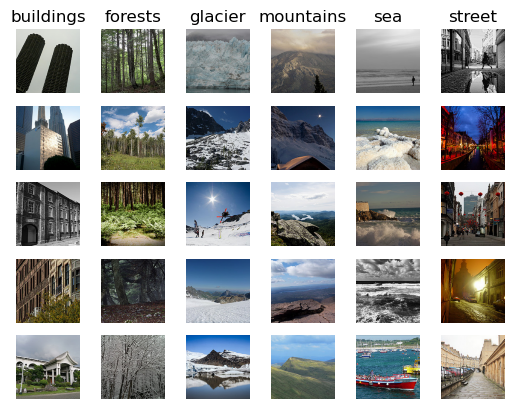

In [10]:
# 데이터셋에서 각 클래스에 따른 일부 데이터를 시각화합니다.
classes = ['buildings', 'forests', 'glacier', 'mountains', 'sea', 'street']
# 각 클래스마다 특정 개수의 이미지를 출력합니다.
samples_per_class = 5


# 데이터 시각화 함수 구현
def visualize_data(dataset, classes, samples_per_class):
    num_classes = len(classes)
    for y, cls in enumerate(classes): # 각 클래스를 (클래스, 클래스명) 형식으로 순회
        idxs = np.flatnonzero(y_train == y) # 해당 클래스를 갖는(True 값을 갖는) 데이터 인덱스 계산
        idxs = np.random.choice(idxs, samples_per_class, replace=False) # 특정 개수만큼 무작위로 선택
        for i, idx in enumerate(idxs): # 하나씩 이미지를 확인하며
            plt_idx = i * num_classes + y + 1 # 이미지를 출력할 위치: 각 열(column)에 차례대로 출력하도록 설정
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(X_train[idx])
            plt.axis('off')
            if i == 0:
                plt.title(cls)
    plt.show()

visualize_data(X_train, classes, samples_per_class)

#### <b>Problem 4. 학습/검증 데이터셋 전처리</b>

* 선형 모델(linear model)을 학습할 예정이므로, 각 이미지를 벡터로 변경합니다.
* 다음과 같이 X_train, y_train, X_test, y_test 변수의 shape이 구성되도록 소스코드를 작성하세요.
    * <b>X_train</b>: (13627, 12288)
    * <b>y_train</b>: (13627,)
    * <b>X_test</b>: (3407, 12288)
    * <b>y_test</b>: (3407,)
* 본 실습에서는 <b>데이터 정규화(normalization)</b>을 수행하지 않습니다.

In [11]:
custom_size_all = custom_size[0]*custom_size[1]*custom_size[2]
X_train = np.reshape(X_train,(X_train.shape[0],custom_size_all))
X_val = np.reshape(X_val,(X_val.shape[0],custom_size_all))

#### <b>(Hint) 데이터셋 구성 확인하기</b>

* 정상적으로 데이터셋이 구성되었다면, 아래 코드의 실행 결과가 다음과 같아야 합니다.

<pre>
학습 이미지: (13627, 12288)
학습 레이블: (13627,)
검증 이미지: (3407, 12288)
검증 레이블: (3407,)
</pre>

In [12]:
print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_val.shape)
print('검증 레이블:', y_val.shape)

학습 이미지: (13627, 12288)
학습 레이블: (13627,)
검증 이미지: (3407, 12288)
검증 레이블: (3407,)


#### <b>(알아보기) Logistic Regression 라이브러리를 이용한 선형 분류 모델 학습 방법</b>

* sklearn.linear_model에서 제공하는 LogisticRegression을 이용합니다.
    * 참고: [LogisticRegression 문서](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
    * 기본적으로 GPU를 지원하지 않기 때문에, 학습 속도가 느릴 수 있습니다.
* LogisticRegression의 주요 파라미터는 다음과 같습니다.
    * <b>penalty</b>: 정규화(normalization) 목적으로 사용할 norm을 명시(default='l2')
    * <b>solver</b>: 최적화(optimization)을 진행할 때 사용할 알고리즘(default='lbfgs') 
    * <b>max_iter</b>: 수렴(convergence)을 위해 반복할 횟수(default=100)
    * <b>multi_class</b>: 클래스(class)의 개수가 여러 개인지 확인(default='auto')
    * <b>verbose</b>: 자세한 학습 결과를 표시(default=0)

* 예를 들어 10번의 반복(iteration)을 수행하여 학습하는 코드는 다음과 같습니다.

<pre>
model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=10)
model.fit(X_train, y_train)
</pre>

* 너무 적은 횟수로 반복하여 수렴이 되지 않은 경우에는 다음과 같은 경고(warning) 메시지가 출력될 수 있습니다.
    * 이때 max_iter의 값을 증가시킴으로써 경고 메시지가 나오지 않도록 할 수 있습니다.
    * 생각해 보기: 완전히 수렴하도록 만드는 것이 성능 향상에 도움이 될까요?

<pre>
ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
</pre>

In [13]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time() # 시작 시간

model = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=10)
model.fit(X_train, y_train)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 1.0934381484985352


C:\Users\USER\anaconda3\envs\SU\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### <b>(알아보기) 학습된 모델의 정확도 계산 방법</b>

* 학습된 LogisticRegression 모델의 정확도를 평가합니다.
* accuracy_score 메서드를 이용할 수 있습니다.

In [14]:
from sklearn.metrics import accuracy_score


y_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

학습 데이터셋 정확도: 0.48602040067513025
검증 데이터셋 정확도: 0.483416495450543
클래스: [0 1 2 3 4 5]
반복 횟수: [10]
학습된 가중치 크기: (6, 12288)


#### <b>(알아보기) 개별 이미지에 대하여 판별 수행</b>

* 몇 개의 이미지에 대하여 판별을 수행한 결과를 출력할 수 있습니다.

<pre>
0. 빌딩(buildings)
1. 숲(forests)
2. 빙하(glacier)
3. 산(mountains)
4. 바다(sea)
5. 거리(street)
</pre>

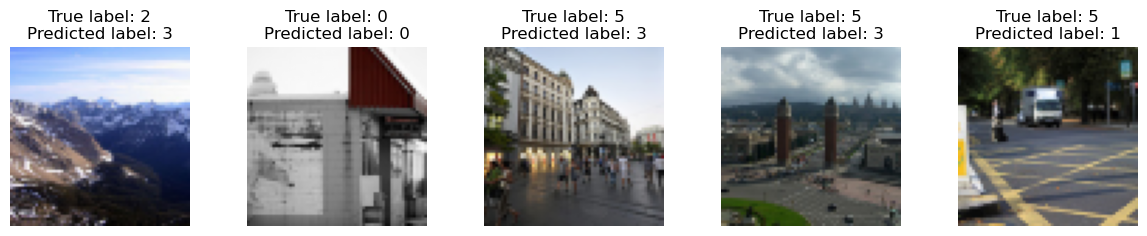

In [15]:
max_cnt = 5

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_val[:max_cnt], y_val[:max_cnt], model.predict(X_val[:max_cnt])):
    ax.imshow(np.reshape(image, (64, 64, 3))) # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')

#### <b>(알아보기) 혼동 행렬 시각화하기</b>

* 참고: [Seaborn.heatmap 공식 문서](https://seaborn.pydata.org/generated/seaborn.heatmap.html) 
* 각 클래스에 대하여 정확히 분류하는지 확인하기 위해 혼동 행렬(confusion matrix)을 생성할 수 있습니다.
* 생각해 보기: 어떤 클래스에 대하여 가장 분류 정확도가 떨어지나요? 그 이유는 무엇이라고 생각하나요?<br>
Sea를 분류한 것이 가장 정확도가 떨어진다. 아무래도 glacier, mountain과 비슷한 색상을 가진 이미지가 많아서 그런 것 같다.

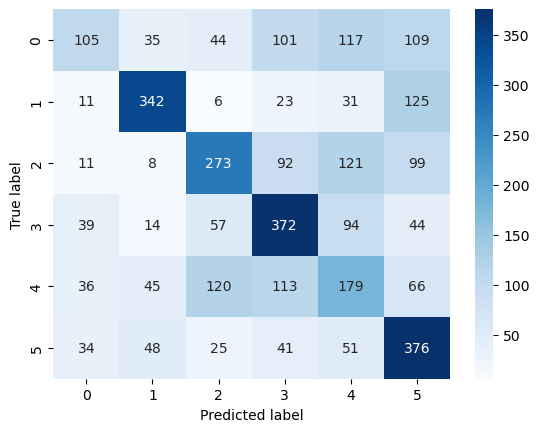

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns     

cm = confusion_matrix(y_val, y_pred)
df_cm = pd.DataFrame(cm)
df_cm.index.name = 'True label'
df_cm.columns.name = 'Predicted label'

# Seaborn heatmeap을 이용하여 화면에 출력하기
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.show()

#### <b>Problem 6. Logistic Regression 모델의 성능 평가하기</b>

* 다음의 코드를 실행하여 실행 결과를 정리하세요.
    * 실행 결과는 매 번 달라질 수 있습니다.
* 반복 횟수가 10일 때
    * 학습 데이터셋 정확도: {0.49504659866441625}
    * 검증 데이터셋 정확도: {0.5060170237745818}
* 반복 횟수가 30일 때
    * 학습 데이터셋 정확도: {0.5454612167021354}
    * 검증 데이터셋 정확도: {0.5415321397123569}
* 반복 횟수가 50일 때
    * 학습 데이터셋 정확도: {0.5592573567182799}
    * 검증 데이터셋 정확도: {0.5532726739066628}
* 반복 횟수가 100일 때
    * 학습 데이터셋 정확도: {0.6004990093197329}
    * 검증 데이터셋 정확도: {0.5330202524214852}
* 반복 횟수가 200일 때
    * 학습 데이터셋 정확도: {0.6781389887722903}
    * 검증 데이터셋 정확도: {0.5092456706780158}
* 반복 횟수가 300일 때
    * 학습 데이터셋 정확도: { 0.7306817347912233}
    * 검증 데이터셋 정확도: {0.498385676548283}
* 반복 횟수가 많을 수록 검증 성능이 좋아지나요? {답을 쓰세요.}
    * 반복 횟수가 100까지 갔을 때는 점점 검증 성능이 좋아졌다가, 200,300으로 가면서 줄어드는 것을 확인할 수 있다. 왜냐하면 학습 데이터 셋에 모델이 맞춰지면서 overffiting 되었기 때문이다. 따라서 적절한 epoch를 주는 것이 중요하다.

In [17]:
from sklearn.linear_model import LogisticRegression

for iter in [10, 30, 50, 100, 200, 300]:
    start_time = time.time() # 시작 시간

    model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=iter)
    model.fit(X_train, y_train)

    print("====================================================")
    print(f'[학습 완료(max_iter={iter})]')

    y_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred)
    print('학습 데이터셋 정확도:', train_acc)

    y_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, y_pred)
    print('검증 데이터셋 정확도:', val_acc)

    print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
    print("====================================================")

C:\Users\USER\anaconda3\envs\SU\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=10)]
학습 데이터셋 정확도: 0.48602040067513025
검증 데이터셋 정확도: 0.483416495450543
소요된 시간(초 단위): 1.2789368629455566


C:\Users\USER\anaconda3\envs\SU\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=30)]
학습 데이터셋 정확도: 0.5471490423424085
검증 데이터셋 정확도: 0.5327267390666275
소요된 시간(초 단위): 2.4682888984680176


C:\Users\USER\anaconda3\envs\SU\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=50)]
학습 데이터셋 정확도: 0.5607250311880825
검증 데이터셋 정확도: 0.539771059583211
소요된 시간(초 단위): 3.784097194671631


C:\Users\USER\anaconda3\envs\SU\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=100)]
학습 데이터셋 정확도: 0.6140016144419168
검증 데이터셋 정확도: 0.5274434986791899
소요된 시간(초 단위): 7.162527322769165


C:\Users\USER\anaconda3\envs\SU\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[학습 완료(max_iter=200)]
학습 데이터셋 정확도: 0.6855507448447934
검증 데이터셋 정확도: 0.48928676254769593
소요된 시간(초 단위): 13.701744079589844
[학습 완료(max_iter=300)]
학습 데이터셋 정확도: 0.7413223746972921
검증 데이터셋 정확도: 0.4763721749339595
소요된 시간(초 단위): 20.058759689331055


C:\Users\USER\anaconda3\envs\SU\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### <b>(알아보기) 데이터 증진(Data augmentation): Shift와 Flip</b>

* 데이터 증진 함수를 다음과 같이 구현할 수 있습니다.
    * <b>이동(shift)</b>: 이미지를 이동시킵니다.
    * <b>뒤집기(flip)</b>: 이미지를 상하 혹은 좌우 반전시킵니다.

In [18]:
from scipy.ndimage.interpolation import shift


def shift_image(image, dx, dy):
    image = image.reshape((64, 64, 3))
    # dy, dx는 각각 너비, 높이 기준으로 이동할 크기
    shifted_image = shift(image, [dy, dx, 0])
    return shifted_image.reshape([-1])


def horizontal_flip(image):
    image = image.reshape((64, 64, 3))
    # 수직 반전(vertical flip): axis=0, 수평 반전(horizontal flip): axis=1
    flipped_image = np.flip(image, axis=1)
    return flipped_image.reshape([-1])

C:\Users\USER\AppData\Local\Temp\ipykernel_10896\1387325497.py:1: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


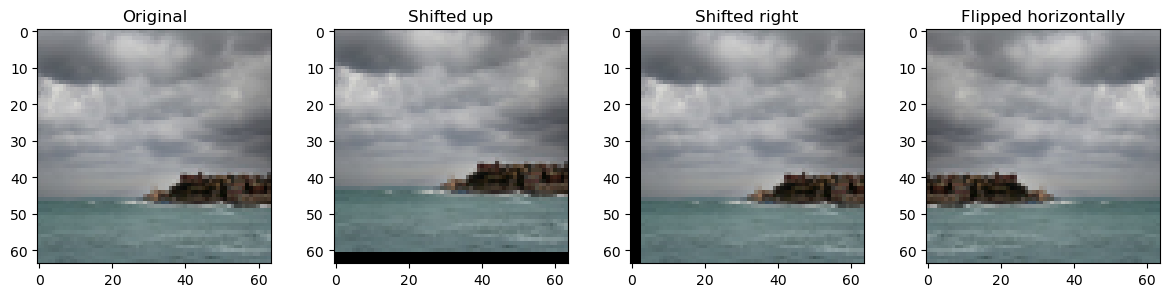

In [19]:
# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, 4)
fig.set_size_inches(12, 4)
fig.tight_layout()

image = X_train[0]
shifted_image_up = shift_image(image, 0, -3)
shifted_image_right = shift_image(image, 3, 0)
flipped_image = horizontal_flip(image)

# 출력할 때는 이미지 해상도에 맞게 재변형
axes[0].imshow(np.reshape(image, (64, 64, 3)))
axes[0].set_title('Original')
axes[1].imshow(np.reshape(shifted_image_up, (64, 64, 3)))
axes[1].set_title('Shifted up')
axes[2].imshow(np.reshape(shifted_image_right, (64, 64, 3)))
axes[2].set_title('Shifted right')
axes[3].imshow(np.reshape(flipped_image, (64, 64, 3)))
axes[3].set_title('Flipped horizontally')

plt.show()

#### <b>Problem 7. 데이터 전처리를 활용하여 선형 모델의 분류 성능 높이기</b>

* 마찬가지로 LinearRegression을 사용하는 상태에서, 데이터 전처리만 적용하여 성능을 높이는 방법을 찾아 보세요.
    * 데이터 증진(data augmentation)
    * (옵션) 데이터 정규화(normalization)
* LinearRegression에서 학습 횟수(max_iter)와 같은 파라미터는 자유롭게 변경해도 됩니다.
* 검증 정확도(validation accuracy)를 <b>최소 55% 이상</b>으로 만드세요.
* <b>데이터 증진(data augmentation)</b> 적용 예시
    * 단, 아래 방식으로 데이터 증진을 과도하게 적용하는 경우에는 메모리 부족으로 세션이 다운될 수 있습니다.

<pre>
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

# 이미지를 하나씩 확인하며 변형된 이미지 추가
cnt = 0
for image, label in zip(X_train, y_train):
    dx = random.uniform(1, 3)
    dy = random.uniform(1, 3)
    X_train_augmented.append(shift_image(image, dx, dy))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# 증진된 데이터들을 섞기(shuffle)
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]
</pre>

* <b>(옵션) 데이터 정규화(data normalization)</b>
    * 원하는 경우 데이터 정규화를 적용할 수 있습니다.
    * 참고로 데이터 정규화를 적용하는 경우 검증(validation) 데이터에도 적용해야 합니다.

<pre>
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_train_augmented)

X_train_augmented = scaler.transform(X_train_augmented)
X_val = scaler.transform(X_val)
</pre>

In [20]:
from sklearn.preprocessing import StandardScaler
import random
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

# 이미지를 하나씩 확인하며 변형된 이미지 추가
cnt = 0
for image, label in zip(X_train, y_train):
    dx = random.uniform(1, 3)
    dy = random.uniform(1, 3)
    temp = shift_image(image, dx, dy)
    X_train_augmented.append(temp)
    y_train_augmented.append(label)
    X_train_augmented.append(horizontal_flip(image))
    y_train_augmented.append(label)
    X_train_augmented.append(horizontal_flip(temp))
    y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

# 증진된 데이터들을 섞기(shuffle)
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

scaler = StandardScaler()
scaler.fit(X_train_augmented)

X_train_augmented = scaler.transform(X_train_augmented)
X_val = scaler.transform(X_val)

#### <b>(Hint) 학습 완료된 모델 확인하기</b>

* 데이터 증진 및 하이퍼 파라미터가 효과적으로 설정되었다면, <b>검증 데이터셋 정확도가 55% 이상</b> 나오는 것이 가능합니다.
    * 검증 정확도를 55% 이상으로 만드세요.

In [21]:
model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=32)
model.fit(X_train_augmented, y_train_augmented)
y_pred = model.predict(X_train_augmented)
train_acc = accuracy_score(y_train_augmented, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

C:\Users\USER\anaconda3\envs\SU\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


학습 데이터셋 정확도: 0.5769795259411462
검증 데이터셋 정확도: 0.5532726739066628
클래스: [0 1 2 3 4 5]
반복 횟수: [32]
학습된 가중치 크기: (6, 12288)


In [77]:
model = LogisticRegression(multi_class="multinomial",solver="lbfgs", max_iter=35)
model.fit(X_train_augmented, y_train_augmented)
y_pred = model.predict(X_train_augmented)
train_acc = accuracy_score(y_train_augmented, y_pred)
print('학습 데이터셋 정확도:', train_acc)

y_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print('클래스:', model.classes_)
print('반복 횟수:', model.n_iter_)
print('학습된 가중치 크기:', model.coef_.shape)

C:\Users\USER\anaconda3\envs\SU\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


학습 데이터셋 정확도: 0.5790342701988699
검증 데이터셋 정확도: 0.5559142941003815
클래스: [0 1 2 3 4 5]
반복 횟수: [35]
학습된 가중치 크기: (6, 12288)


#### <b>Problem 8. KNN 모델 평가 및 성능 높이기</b>

* 이번에는 KNN 모델을 이용하여 분류(classification)를 진행해 봅시다.
* 아래 소스 코드를 자유롭게 변형하여 <b>검증 정확도(validation accuracy)를 최대한으로 높이는 것이 목표</b>입니다.

1. <b>자신만의 거리 메트릭(metric)을 추가</b>해 보세요. 현재는 L1_distance(), L2_distance()만 존재합니다.
    * <b>(예시)</b> L1과 L2 거리(distance)를 섞은 나만의 거리 메트릭
2. 데이터 증진(data augmentation)을 포함해 다양한 기법을 자유롭게 적용해도 됩니다.
    * <b>(주의)</b> 메모리가 초과되면 세션이 다운될 수 있습니다.
* <b>내가 얻은 최고의 검증 정확도</b>: {답을 쓰세요.}

In [74]:
from collections import Counter
from scipy.spatial.distance import cdist
from sklearn.metrics.pairwise import cosine_distances
class kNearestNeighbors(object):
    def __init__(self):
        pass
#         self.ss = 0
        
    def train(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def L1_distance(self, x):
        # sum absolute error
        distances = np.sum(np.abs(self.X_train - x), axis=1)
        return distances
    
    def L2_distance(self, x):
        # root sum square error
        distances = np.sqrt(np.sum(np.square(self.X_train - x), axis=1))
        return distances
    
    def my_distance0(self, x):
        # root mean square error(rmse)
        distances = np.sqrt(np.mean(np.square(self.X_train - x), axis=1))
        return distances
    
    def my_distance1(self, x):
        # mean square error(mse)
        distances = np.mean(np.square(self.X_train - x), axis=1)
        return distances
    
    def my_distance2(self, x):
        # root mean square log error(rmsle)
        distances = np.log10(np.sqrt(np.mean(np.abs(self.X_train - x), axis=1)))
#         print(self.ss)
#         self.ss+=1
        return distances

    def my_distance3(self, x):
        # 마할라노비스
        print(self.X_train.shape)
        print(x.shape)
        x_re = np.reshape(x,[1,x.shape[0]])
        distances = np.diag(cdist(self.X_train,x_re,'mahalanobis'))
    def cos_distance(self, x):
        distances = cosine_distances(self.X_train, x.reshape(1, -1)).flatten()
        return distances
#         distances = np.mean(np.abs(self.X_train - x)/self.X_train, axis=1)
#         print(self.ss)
#         self.ss+=1
        return distances

    def predict(self, X_val, k, distance):
        num_val = X_val.shape[0]
        y_pred = np.zeros((num_val), dtype=int)

        for i in range(num_val):
            shortest = []
            # 각 검증 이미지(i번째 이미지)마다 모든 학습 이미지와의 거리 계산
            if distance == 'L1':
                distances = self.L1_distance(X_val[i, :])
            if distance == 'L2':
                distances = self.L2_distance(X_val[i, :])
            if distance == 'mine0':
                distances = self.my_distance0(X_val[i, :])
            if distance == 'mine1':
                distances = self.my_distance1(X_val[i, :])
            if distance == 'mine2':
                distances = self.my_distance2(X_val[i, :])
            if distance == 'mine3':
                distances = self.my_distance3(X_val[i, :])
            if distance == 'cos':
                distances = self.cos_distance(X_val[i, :])
            min_indices = np.argsort(distances) # 가까운 학습 이미지 순으로 정렬
            for j in range(k): # 가장 가까운 k개의 학습 이미지의 인덱스를 확인해 레이블 정보 기록
                shortest.append(self.y_train[min_indices[j]])
            y_pred[i] = Counter(shortest).most_common(1)[0][0] # 가장 많이 등장한 레이블(label) 계산
        return y_pred

In [25]:
start_time = time.time() # 시작 시간

knn = kNearestNeighbors()
knn.train(X_train, y_train)

# KNN 클래스(class) 코드를 적절히 수정한 뒤에 k 및 distance 값을 조절하여 검증 정확도를 최대한 높여 보세요.
y_pred = knn.predict(X_val, k=3, distance='mine0')
val_acc = accuracy_score(y_val, y_pred)
print('검증 데이터셋 정확도:', val_acc)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
print("====================================================")

max_cnt = 5

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_val[:max_cnt], y_val[:max_cnt], y_pred[:max_cnt]):
    ax.imshow(np.reshape(image, (64, 64, 3))) # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')

KeyboardInterrupt: 

#### <b>(알아보기) 하이퍼 파라미터 찾기</b>

* distance와 k의 값을 적절히 조절하여 <b>가장 성능이 우수한 파라미터를 찾을 필요</b>가 있습니다.
* 전체 검증 데이터는 3,000개 이상이므로 많은 시간이 소요될 수 있습니다.
    * 따라서 하이퍼 파라미터를 찾을 때는 200개의(일부의) 평가 데이터만 이용하는 것을 추천합니다.
    * 아래 코드는 k=7, 거리(distance) 메트릭으로는 L2를 사용한 코드 예시입니다.

In [28]:
knn = kNearestNeighbors()
knn.train(X_train, y_train)

number = 200
X_val_small = X_val[:number]
y_val_small = y_val[:number]

검증 데이터셋 정확도: 0.435
소요된 시간(초 단위): 122.38553166389465
검증 데이터셋 정확도: 0.425
소요된 시간(초 단위): 123.36339712142944
검증 데이터셋 정확도: 0.42
소요된 시간(초 단위): 123.6019332408905
검증 데이터셋 정확도: 0.42
소요된 시간(초 단위): 122.80218458175659
검증 데이터셋 정확도: 0.445
소요된 시간(초 단위): 121.92246603965759
검증 데이터셋 정확도: 0.455
소요된 시간(초 단위): 122.34045577049255
검증 데이터셋 정확도: 0.465
소요된 시간(초 단위): 121.64674019813538
검증 데이터셋 정확도: 0.425
소요된 시간(초 단위): 121.35781502723694
검증 데이터셋 정확도: 0.41
소요된 시간(초 단위): 121.99279522895813
검증 데이터셋 정확도: 0.39
소요된 시간(초 단위): 121.25368571281433
검증 데이터셋 정확도: 0.395
소요된 시간(초 단위): 121.6474552154541
검증 데이터셋 정확도: 0.445
소요된 시간(초 단위): 122.10520362854004
검증 데이터셋 정확도: 0.47
소요된 시간(초 단위): 121.60924363136292
검증 데이터셋 정확도: 0.455
소요된 시간(초 단위): 121.95177483558655
검증 데이터셋 정확도: 0.425
소요된 시간(초 단위): 122.0969660282135
검증 데이터셋 정확도: 0.41
소요된 시간(초 단위): 121.62586760520935
검증 데이터셋 정확도: 0.39
소요된 시간(초 단위): 121.21938490867615
검증 데이터셋 정확도: 0.395
소요된 시간(초 단위): 121.42941117286682
검증 데이터셋 정확도: 0.445
소요된 시간(초 단위): 121.30429553985596
검증 데이터셋 정확도: 0.47
소요된 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


검증 데이터셋 정확도: 0.455
소요된 시간(초 단위): 121.78587675094604


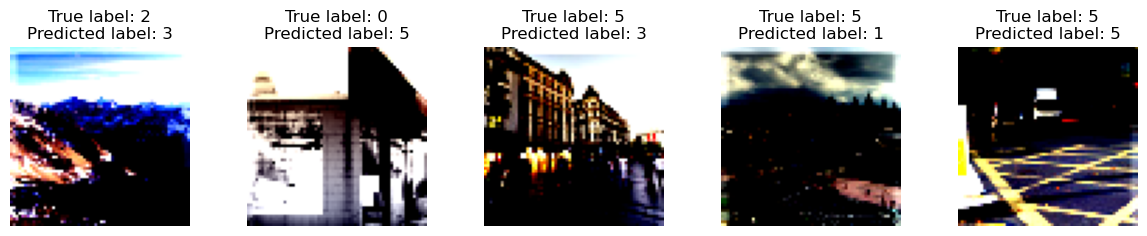

In [30]:
for i in ["L1","L2","mine0"]:
    for K in range(3,16,2):
        start_time = time.time() # 시작 시간
        y_pred = knn.predict(X_val_small, k=K, distance=i)
        val_acc = accuracy_score(y_val_small, y_pred)
        print('검증 데이터셋 정확도:', val_acc)

        print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
        print("====================================================")

max_cnt = 5

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_val_small[:max_cnt], y_val_small[:max_cnt], y_pred[:max_cnt]):
    ax.imshow(np.reshape(image, (64, 64, 3))) # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')

In [36]:
knn = kNearestNeighbors()
knn.train(X_train, y_train)
for i in ["mine1","mine2"]:
    for K in range(3,16,2):
        start_time = time.time() # 시작 시간
        y_pred = knn.predict(X_val_small, k=K, distance=i)
        val_acc = accuracy_score(y_val_small, y_pred)
        print('검증 데이터셋 정확도:', val_acc)

        print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
        print("====================================================")

max_cnt = 5

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_val_small[:max_cnt], y_val_small[:max_cnt], y_pred[:max_cnt]):
    ax.imshow(np.reshape(image, (64, 64, 3))) # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')

검증 데이터셋 정확도: 0.425
소요된 시간(초 단위): 121.21001768112183
검증 데이터셋 정확도: 0.41
소요된 시간(초 단위): 122.65052700042725
검증 데이터셋 정확도: 0.39
소요된 시간(초 단위): 123.4065158367157
검증 데이터셋 정확도: 0.395
소요된 시간(초 단위): 122.30794835090637
검증 데이터셋 정확도: 0.445
소요된 시간(초 단위): 122.36693143844604
검증 데이터셋 정확도: 0.47
소요된 시간(초 단위): 121.96149253845215
검증 데이터셋 정확도: 0.455
소요된 시간(초 단위): 122.215092420578


UnboundLocalError: local variable 'distances' referenced before assignment

검증 데이터셋 정확도: 0.425
소요된 시간(초 단위): 120.9240288734436
검증 데이터셋 정확도: 0.41
소요된 시간(초 단위): 121.210688829422
검증 데이터셋 정확도: 0.39
소요된 시간(초 단위): 121.2887818813324
검증 데이터셋 정확도: 0.395
소요된 시간(초 단위): 120.8960337638855
검증 데이터셋 정확도: 0.445
소요된 시간(초 단위): 120.99640774726868
검증 데이터셋 정확도: 0.47
소요된 시간(초 단위): 121.6766664981842


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


검증 데이터셋 정확도: 0.455
소요된 시간(초 단위): 121.30283808708191


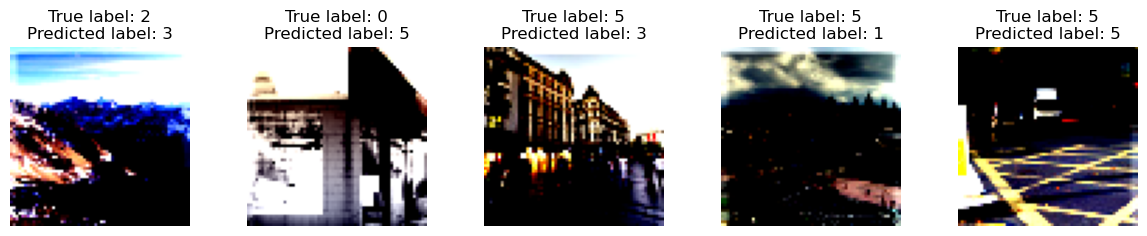

In [55]:
knn = kNearestNeighbors()
knn.train(X_train, y_train)
for K in range(3,16,2):
    start_time = time.time() # 시작 시간
    y_pred = knn.predict(X_val_small, k=K, distance='mine2')
    val_acc = accuracy_score(y_val_small, y_pred)
    print('검증 데이터셋 정확도:', val_acc)

    print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
    print("====================================================")

max_cnt = 5

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_val_small[:max_cnt], y_val_small[:max_cnt], y_pred[:max_cnt]):
    ax.imshow(np.reshape(image, (64, 64, 3))) # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')

검증 데이터셋 정확도: 0.4
소요된 시간(초 단위): 132.13004994392395
검증 데이터셋 정확도: 0.46
소요된 시간(초 단위): 132.34878826141357
검증 데이터셋 정확도: 0.5
소요된 시간(초 단위): 131.28045439720154
검증 데이터셋 정확도: 0.48
소요된 시간(초 단위): 131.42435002326965
검증 데이터셋 정확도: 0.465
소요된 시간(초 단위): 159.04523086547852
검증 데이터셋 정확도: 0.475
소요된 시간(초 단위): 139.55036187171936


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


검증 데이터셋 정확도: 0.475
소요된 시간(초 단위): 131.56946682929993


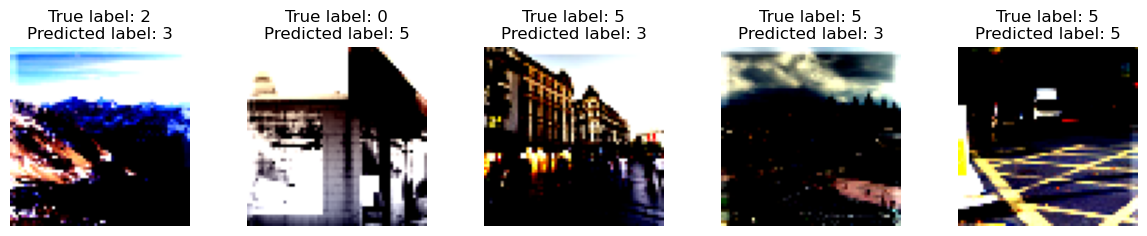

In [75]:
knn = kNearestNeighbors()
knn.train(X_train, y_train)
for K in range(3,16,2):
    start_time = time.time() # 시작 시간
    y_pred = knn.predict(X_val_small, k=K, distance='cos')
    val_acc = accuracy_score(y_val_small, y_pred)
    print('검증 데이터셋 정확도:', val_acc)

    print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간
    print("====================================================")

max_cnt = 5

# 이미지들이 들어갈 수 있는 그림(figure) 생성
fig, axes = plt.subplots(1, max_cnt)
fig.set_size_inches(12, 4)
fig.tight_layout()

for ax, image, label, pred in zip(axes, X_val_small[:max_cnt], y_val_small[:max_cnt], y_pred[:max_cnt]):
    ax.imshow(np.reshape(image, (64, 64, 3))) # 출력할 때는 이미지 해상도에 맞게 재변형
    ax.axis('off')
    ax.set_title(f'True label: {label}\nPredicted label: {pred}')

#### <b>(알아보기) 커스텀 데이터셋 찾기</b>

* 다양한 웹 사이트에서 데이터셋을 다운로드할 수 있습니다.
    * Roboflow 공공(public) 데이터셋: https://public.roboflow.com/classification
    * 캐글(Kaggle) 데이터셋: https://www.kaggle.com/datasets

* 다음과 같이 사이트에 방문하여 데이터셋을 둘러볼 수 있습니다.
* Roboflow에서는 Jupyter Notebook에서 바로 적용 가능한 데이터셋 다운로드 코드를 제공합니다.

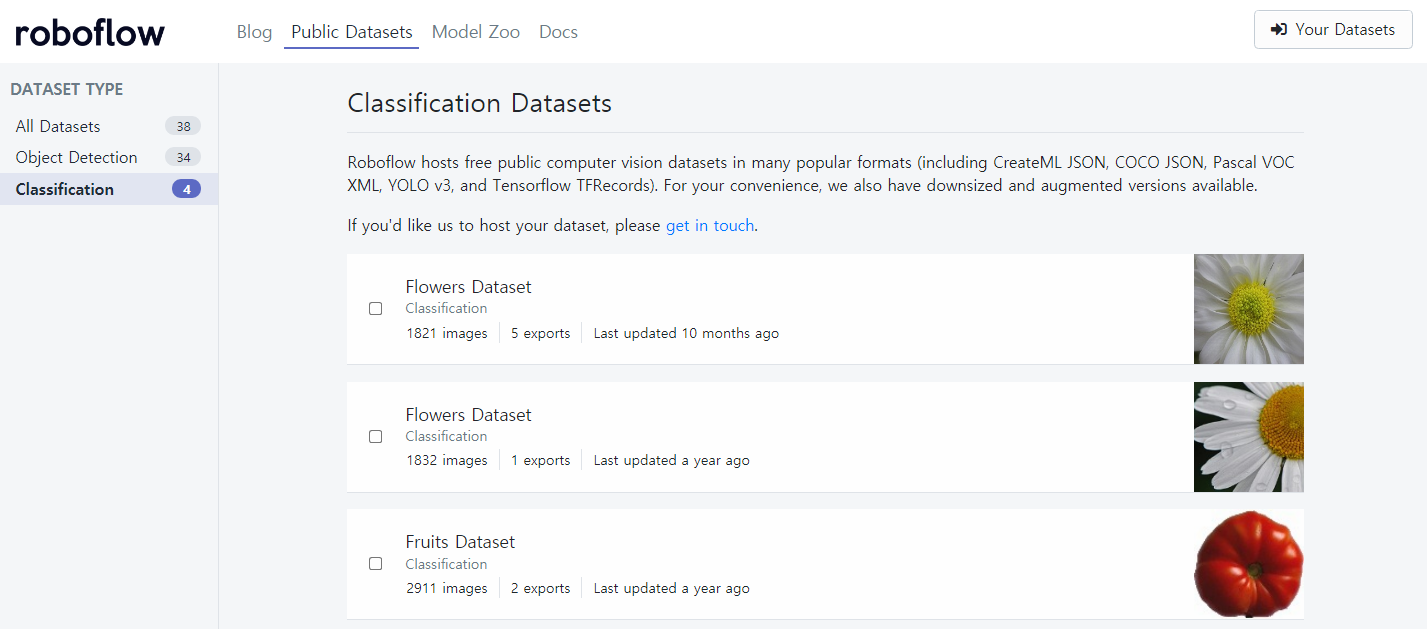

#### <b>Problem 9. 커스텀 데이터셋 분류해 보기</b>

* 자신만의 커스텀 데이터셋을 준비하여 분류(classification) 모델을 학습해 봅시다.
* 아래쪽 코드는 완전히 자유롭게 작성하시면 됩니다.